### Pre-processing: Air BNB data set

### <font color= '#eb3483'> Imports and mounting to drive

In [ ]:
#imports 
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

In [ ]:
#Mount google drive
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/CIS 450/CIS 450 Project/listings.csv.gz'

In [ ]:
#load data into a dataframe
df = pd.read_csv(path, header=[0])
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-02-0

### <font color= '#eb3483'> Explore data types and values

In [ ]:
#explore typles
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [ ]:
#look at all columns 
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
#look at shape
df.shape

(37012, 74)

In [ ]:
#how many unique values do we have
df.apply('nunique').sort_values(ascending=True)

calendar_updated        0
bathrooms               0
license                 0
scrape_id               1
has_availability        2
                    ...  
description         33912
name                35912
picture_url         36148
listing_url         37012
id                  37012
Length: 74, dtype: int64

In [ ]:
#only keep certain columns based on what we need
keep = [
        'id', 'listing_url', 'name', 'neighbourhood', 
        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'price', 
        'minimum_nights', 'maximum_nights', 'review_scores_rating', 
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value'  
]
df = df[keep]

In [ ]:
#can reset the index to be the id
df = df.set_index('id')

In [ ]:
#now look at unique values of what we have
df.apply('nunique').sort_values(ascending=False)

listing_url                     37012
name                            35912
latitude                        17044
longitude                       13557
price                             733
maximum_nights                    278
neighbourhood                     221
neighbourhood_cleansed            220
minimum_nights                    125
property_type                      75
review_scores_rating               53
accommodates                       17
review_scores_accuracy              9
review_scores_cleanliness           9
review_scores_checkin               9
review_scores_communication         9
review_scores_value                 9
review_scores_location              8
neighbourhood_group_cleansed        5
room_type                           4
dtype: int64

In [ ]:
#look at percent null values 
df.isna().sum() * 100 / df.shape[0]

listing_url                      0.000000
name                             0.035124
neighbourhood                   36.969091
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
price                            0.000000
minimum_nights                   0.000000
maximum_nights                   0.000000
review_scores_rating            27.653194
review_scores_accuracy          27.718037
review_scores_cleanliness       27.688317
review_scores_checkin           27.750459
review_scores_communication     27.712634
review_scores_location          27.753161
review_scores_value             27.753161
dtype: float64

#### <font color= pink> Column: Name

In [ ]:
df.name.isna().sum() 

13

In [ ]:
df[~df.name.isna()].head(5)

,listing_url,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,
2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,$100.00,30,1125,94.0,9.0,9.0,10.0,10.0,10.0,9.0
3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,$73.00,1,730,90.0,10.0,9.0,9.0,10.0,10.0,10.0
5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,$60.00,30,730,90.0,8.0,8.0,10.0,10.0,9.0,9.0
5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,"New York, United States",Midtown,Manhattan,40.76468,-73.98315,Private room in apartment,Private room,2,$79.00,2,14,84.0,9.0,8.0,9.0,9.0,10.0,9.0
5203,https://www.airbnb.com/rooms/5203,Cozy Clean Guest Room - Family Apt,"New York, United States",Upper West Side,Manhattan,40.80178,-73.96723,Private room in apartment,Private room,1,$75.00,2,14,98.0,10.0,10.0,10.0,10.0,10.0,10.0


In [ ]:
df[df.name.isna()]

,listing_url,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,
1615764,https://www.airbnb.com/rooms/1615764,NaN,"New York, United States",Battery Park City,Manhattan,40.71239,-74.01620,Entire apartment,Entire home/apt,2,$400.00,1000,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232600,https://www.airbnb.com/rooms/2232600,NaN,NaN,East Village,Manhattan,40.73215,-73.98821,Entire apartment,Entire home/apt,2,$200.00,30,365,95.0,10.0,9.0,10.0,10.0,10.0,10.0
4209595,https://www.airbnb.com/rooms/4209595,NaN,NaN,Greenwich Village,Manhattan,40.73473,-73.99244,Entire apartment,Entire home/apt,4,$225.00,30,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4370230,https://www.airbnb.com/rooms/4370230,NaN,NaN,Nolita,Manhattan,40.72046,-73.99550,Entire apartment,Entire home/apt,2,$215.00,30,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4581788,https://www.airbnb.com/rooms/4581788,NaN,NaN,Williamsburg,Brooklyn,40.71370,-73.94378,Private room in apartment,Private room,1,$150.00,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4756856,https://www.airbnb.com/rooms/4756856,NaN,NaN,Bushwick,Brooklyn,40.70046,-73.92825,Private room in apartment,Private room,1,$70.00,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4774658,https://www.airbnb.com/rooms/4774658,NaN,NaN,Washington Heights,Manhattan,40.85198,-73.93108,Private room in apartment,Private room,1,$40.00,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6782407,https://www.airbnb.com/rooms/6782407,NaN,"Brooklyn, New York, United States",Williamsburg,Brooklyn,40.71354,-73.93882,Private room in apartment,Private room,1,$45.00,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9325951,https://www.airbnb.com/rooms/9325951,NaN,NaN,Hell's Kitchen,Manhattan,40.76436,-73.98573,Entire apartment,Entire home/apt,2,$190.00,30,1125,100.0,8.0,8.0,10.0,10.0,10.0,10.0


Since the data entries with no names have a lot of null values especially in the review section it will probably be beneficial to drop these, it is only 13 entries. will come back to this though after reviews analysis

#### <font color= pink> Column: Neighbourhood

Neighbourhood was composed of 37% null values, so lets look more closely at this column and how it compares to the cleansed/ group_cleansed columns which do not have any nulls

In [ ]:
df[df.neighbourhood.isna()].head(10)

,listing_url,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,
5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,$60.00,30,730,90.0,8.0,8.0,10.0,10.0,9.0,9.0
6848,https://www.airbnb.com/rooms/6848,Only 2 stops to Manhattan studio,NaN,Williamsburg,Brooklyn,40.70837,-73.95352,Entire apartment,Entire home/apt,3,$109.00,30,730,91.0,9.0,10.0,10.0,10.0,9.0,9.0
7750,https://www.airbnb.com/rooms/7750,2 Furnished bedrooms next to Central Park,NaN,East Harlem,Manhattan,40.79685,-73.94872,Private room in apartment,Private room,1,$96.00,30,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8490,https://www.airbnb.com/rooms/8490,"Maison des Sirenes1,bohemian, luminous apartment",NaN,Bedford-Stuyvesant,Brooklyn,40.68371,-73.94028,Entire loft,Entire home/apt,5,$120.00,2,1125,95.0,10.0,9.0,10.0,10.0,10.0,9.0
9704,https://www.airbnb.com/rooms/9704,Spacious 1 bedroom in luxe building,NaN,Harlem,Manhattan,40.81305,-73.95466,Private room in apartment,Private room,2,$55.00,30,730,98.0,10.0,9.0,10.0,10.0,10.0,10.0
10452,https://www.airbnb.com/rooms/10452,Large B&B Style rooms,NaN,Bedford-Stuyvesant,Brooklyn,40.68310,-73.95473,Private room in apartment,Private room,3,$70.00,30,730,93.0,9.0,9.0,10.0,10.0,9.0,9.0
11943,https://www.airbnb.com/rooms/11943,Country space in the city,NaN,Flatbush,Brooklyn,40.63702,-73.96327,Private room in house,Private room,1,$150.00,30,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12343,https://www.airbnb.com/rooms/12343,BEST BET IN HARLEM,NaN,Harlem,Manhattan,40.81175,-73.94478,Entire apartment,Entire home/apt,3,$150.00,30,730,96.0,10.0,9.0,10.0,10.0,9.0,9.0
13121,https://www.airbnb.com/rooms/13121,(E) RIGHT ON BUDGET,NaN,Jamaica,Queens,40.67144,-73.76501,Private room in house,Private room,4,$75.00,2,365,83.0,9.0,9.0,9.0,9.0,7.0,8.0


Can drop the neighbourhood column because it doesn't provide any additional info because the value is stored in neighborhood_cleansed

In [ ]:
to_drop = ['neighbourhood']
df = df.drop(columns=to_drop, axis=1)

### <font color= '#eb3483'> Renaming columns

In [ ]:
mapping = {'neighbourhood_group_cleansed': 'borough', 
           'neighbourhood_cleansed': 'neighborhood', 
           'minimum_nights': 'min_nights', 
           'maximum_nights': 'max_nights'}
df = df.rename(mapping, axis=1)
df.columns

Index(['listing_url', 'name', 'neighborhood', 'borough', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'min_nights', 'max_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

#### <font color= pink> Column: Property Type

In [ ]:
#how many different values are there 
df.property_type.apply('nunique')

75

In [ ]:
df.property_type.value_counts().sort_values(ascending=True)

Room in resort                    1
Entire bed and breakfast          1
Private room in dome house        1
Shared room in earth house        1
Shared room in island             1
                              ...  
Entire condominium              983
Private room in townhouse      1044
Private room in house          1897
Private room in apartment     12037
Entire apartment              15506
Name: property_type, Length: 75, dtype: int64

In [ ]:
weird_values = df.property_type.value_counts().sort_values(ascending=True)[0:20].reset_index()['index'].to_list()

In [ ]:
weird_values

['Room in resort',
 'Entire bed and breakfast',
 'Private room in dome house',
 'Shared room in earth house',
 'Shared room in island',
 'Shared room in floor',
 'Room in hostel',
 'Private room in lighthouse',
 'Private room in in-law',
 'Bus',
 'Private room in dorm',
 'Private room in farm stay',
 'Private room in tent',
 'Private room in train',
 'Shared room in bungalow',
 'Shared room in guesthouse',
 'Lighthouse',
 'Private room in camper/rv',
 'Cave',
 'Shared room in guest suite']

Clearly there are a lot of property types that only have one listing under that category

#### <font color= pink> Column: Room Type

In [ ]:
df.room_type.apply('nunique')

4

In [ ]:
df.room_type.value_counts()

Entire home/apt    19397
Private room       16630
Shared room          686
Hotel room           299
Name: room_type, dtype: int64

In [ ]:
cols = ['property_type', 'room_type']
df[cols].head(15)

,property_type,room_type
id,,
2595,Entire apartment,Entire home/apt
3831,Entire guest suite,Entire home/apt
5121,Private room in apartment,Private room
5178,Private room in apartment,Private room
5203,Private room in apartment,Private room
5803,Private room in townhouse,Private room
6848,Entire apartment,Entire home/apt
6872,Private room in condominium,Private room
6990,Private room in apartment,Private room


Looks like property_type is a more specific explanation of room type..

In [ ]:
df[df.property_type.isin(weird_values)][cols]

,property_type,room_type
id,,
1682963,Shared room in earth house,Shared room
7302762,Cave,Entire home/apt
13556033,Shared room in guest suite,Shared room
14712466,Shared room in floor,Shared room
16408041,Entire bed and breakfast,Entire home/apt
21461874,Private room in tent,Private room
21475999,Room in hostel,Hotel room
21811459,Private room in in-law,Private room
25348802,Shared room in guest suite,Shared room


So the property type has some weird values... choosing to leave these airbnbs in the dataset because the room_type at least paints them in a more specific light

In [ ]:
df = df.drop(columns='property_type')

### <font color= '#eb3483'> Column: accomodates

In [ ]:
df.accommodates.describe()

count    37012.000000
mean         2.797633
std          1.845570
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


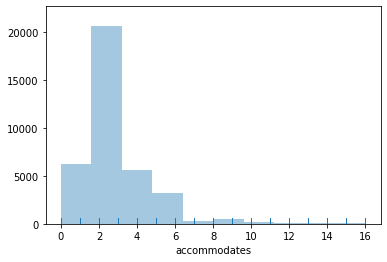

In [ ]:
#histogram for accommodates
sns.distplot(df.accommodates, bins=10, kde=False, rug=True)

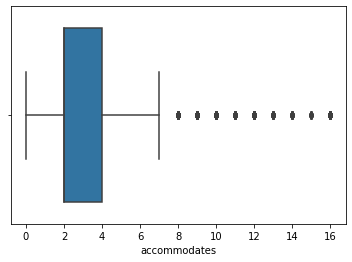

In [ ]:
#boxplot for accommodates
sns.boxplot(x=df.accommodates, data=df)

In [ ]:
df[df.accommodates > 12].head(10)

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,
38663,https://www.airbnb.com/rooms/38663,Luxury Brownstone in Boerum Hill,Boerum Hill,Brooklyn,40.68559,-73.98094,Entire home/apt,13,$650.00,3,60,93.0,10.0,9.0,10.0,10.0,10.0,9.0
45910,https://www.airbnb.com/rooms/45910,Beautiful Queens Brownstone! - 5BR,Ridgewood,Queens,40.70382,-73.89797,Entire home/apt,16,$395.00,30,730,88.0,9.0,9.0,10.0,10.0,10.0,9.0
256049,https://www.airbnb.com/rooms/256049,│ ♛ │SOLOWIHE HOUSE | HOUSE RENTAL,Clinton Hill,Brooklyn,40.69064,-73.96757,Entire home/apt,13,"$4,500.00",1,1125,91.0,10.0,9.0,10.0,9.0,10.0,9.0
279857,https://www.airbnb.com/rooms/279857,Netflix Show Stay Here Yellow Block 8 Room 5 Bath,Bedford-Stuyvesant,Brooklyn,40.68492,-73.95489,Private room,16,$650.00,1,29,97.0,10.0,10.0,10.0,10.0,10.0,10.0
509989,https://www.airbnb.com/rooms/509989,Artist's Ditmas Pk 5 bedroom house,Flatbush,Brooklyn,40.64229,-73.96548,Entire home/apt,16,$371.00,1,29,96.0,10.0,9.0,10.0,10.0,10.0,10.0
512209,https://www.airbnb.com/rooms/512209,Your own townhouse in Bklyn Heights,Brooklyn Heights,Brooklyn,40.69964,-73.99299,Entire home/apt,16,$800.00,4,99,99.0,10.0,10.0,10.0,10.0,10.0,10.0
690934,https://www.airbnb.com/rooms/690934,"*Discount* Huge, 5BR Multi-Terrace Sunny LEGAL...",Park Slope,Brooklyn,40.68305,-73.97853,Entire home/apt,14,$299.00,4,365,99.0,10.0,10.0,10.0,10.0,10.0,9.0
2243699,https://www.airbnb.com/rooms/2243699,"SuperBowl Penthouse Loft 3,000 sqft",Chinatown,Manhattan,40.71744,-73.99731,Entire home/apt,16,"$5,250.00",30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2261367,https://www.airbnb.com/rooms/2261367,brooklyn 14 bedroom gated community,Sea Gate,Brooklyn,40.57645,-74.01065,Entire home/apt,16,"$1,661.00",2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0


The outliers do not look too out of the ordinary so this looks fine 

### <font color= '#eb3483'>Exploring Review Columns

In [ ]:
df.isna().sum()
#these rows have a lot of nulls

listing_url                        0
name                              13
neighborhood                       0
borough                            0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
price                              0
min_nights                         0
max_nights                         0
review_scores_rating           10235
review_scores_accuracy         10259
review_scores_cleanliness      10248
review_scores_checkin          10271
review_scores_communication    10257
review_scores_location         10272
review_scores_value            10272
dtype: int64

In [ ]:
review_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 'review_scores_value']
df[review_cols].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,26777.000000,26753.000000,26764.000000,26741.000000,26755.000000,26740.000000,26740.000000
mean,93.767188,9.586551,9.268009,9.721140,9.712801,9.599589,9.367539
std,9.594491,0.938881,1.146266,0.823948,0.859563,0.794767,1.014201
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
new_names = dict()
for s in review_cols:
  new_names[s] = s.replace('review_scores', 'rs')
df = df.rename(new_names, axis=1)

In [ ]:
review_cols = list(new_names.values())

Okay so we have different grading scales... 

#### <font color=pink> Column: review_scores_rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


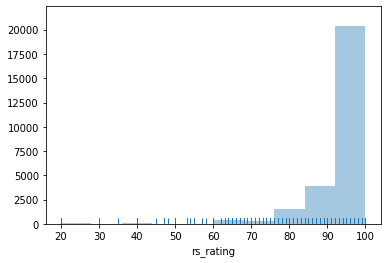

In [ ]:
sns.distplot(df.rs_rating, bins=10, kde=False, rug=True)

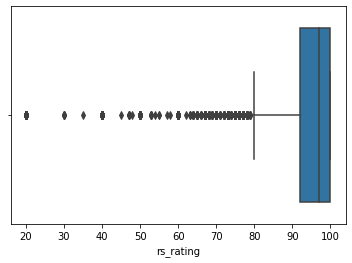

In [ ]:
sns.boxplot(x=df.rs_rating, data=df)

####<font color=pink> Column: rs_location

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


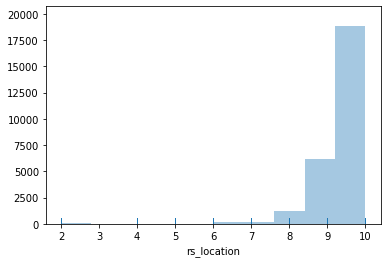

In [ ]:
sns.distplot(df.rs_location, bins=10, kde=False, rug=True)

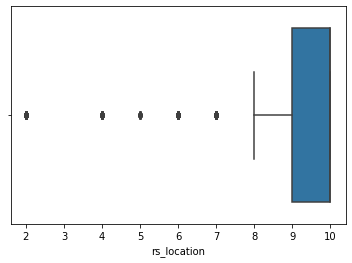

In [ ]:
sns.boxplot(x=df.rs_location, data=df)

In [ ]:
df[(df.rs_location >= 9) & (df.rs_rating < 30)]

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,rs_rating,rs_accuracy,rs_cleanliness,rs_checkin,rs_communication,rs_location,rs_value
id,,,,,,,,,,,,,,,,,,
1925519,https://www.airbnb.com/rooms/1925519,Sublet: $490/Wk,Lower East Side,Manhattan,40.71930,-73.98986,Private room,1,$80.00,30,1125,20.0,6.0,2.0,6.0,6.0,10.0,6.0
4244476,https://www.airbnb.com/rooms/4244476,Sunny and Funky Greenpoint Room,Greenpoint,Brooklyn,40.73093,-73.95332,Private room,2,$75.00,30,1125,20.0,2.0,2.0,10.0,10.0,10.0,2.0
9345523,https://www.airbnb.com/rooms/9345523,Cute Private Bedroom | East Village,East Village,Manhattan,40.72280,-73.98352,Private room,2,$85.00,30,1125,20.0,2.0,2.0,8.0,6.0,10.0,2.0
13217755,https://www.airbnb.com/rooms/13217755,Large Bedroom on upper west/columbia,Upper West Side,Manhattan,40.79934,-73.96527,Private room,2,$90.00,30,47,20.0,4.0,2.0,10.0,10.0,10.0,2.0
14167287,https://www.airbnb.com/rooms/14167287,Peaceful Upper East Side Studio,Upper East Side,Manhattan,40.76656,-73.95389,Entire home/apt,2,$55.00,7,20,20.0,10.0,2.0,10.0,10.0,10.0,4.0
29612338,https://www.airbnb.com/rooms/29612338,Instagrammers Dream Loft,Bedford-Stuyvesant,Brooklyn,40.69374,-73.95619,Entire home/apt,2,$80.00,30,1125,20.0,2.0,2.0,2.0,10.0,10.0,2.0
29832431,https://www.airbnb.com/rooms/29832431,Hart st,Bedford-Stuyvesant,Brooklyn,40.69263,-73.95136,Private room,4,$150.00,30,31,20.0,2.0,6.0,2.0,2.0,10.0,2.0
30974895,https://www.airbnb.com/rooms/30974895,Spacious shared room near L-train,Bushwick,Brooklyn,40.69042,-73.90561,Shared room,3,$23.00,30,1125,20.0,2.0,2.0,2.0,4.0,10.0,10.0
32312837,https://www.airbnb.com/rooms/32312837,Cozy Private BedRoom 20m from Midtown,Jackson Heights,Queens,40.74906,-73.88871,Private room,1,$57.00,30,1125,20.0,4.0,4.0,10.0,10.0,10.0,10.0


In [ ]:
#lets only keep location score and overall score
review_cols.remove('rs_rating')
review_cols.remove('rs_location')

In [ ]:
df = df.drop(columns=review_cols)

### <font color= '#eb3483'> Column: Price

In [ ]:
df.dtypes
#note price is an object

listing_url      object
name             object
neighborhood     object
borough          object
latitude        float64
longitude       float64
room_type        object
accommodates      int64
price            object
min_nights        int64
max_nights        int64
rs_rating       float64
rs_location     float64
dtype: object

In [ ]:
df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')

In [ ]:
df.price = df.price.astype('float')

In [ ]:
df[['price']].describe()

,price
count,37012.000000
mean,142.842240
std,275.740987
min,0.000000
25%,60.000000
50%,99.000000
75%,151.000000
max,10000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


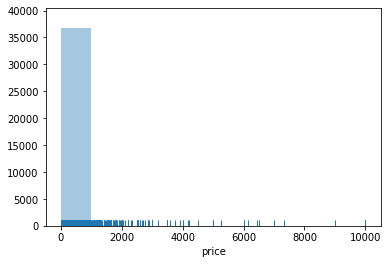

In [ ]:
sns.distplot(df.price, bins=10, kde=False, rug=True)

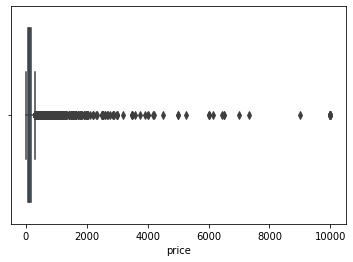

In [ ]:
sns.boxplot(x=df.price, data=df)

In [ ]:
df[df.price == 0].shape[0]

28

In [ ]:
df[(df.price== 0) & ((df.rs_rating.isna()) | (df.rs_location.isna()))].shape[0]

28

Okay so looks like when the price is super low there are other null values... intersting

In [ ]:
df[df.name.isna()]

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,rs_rating,rs_location
id,,,,,,,,,,,,,
1615764,https://www.airbnb.com/rooms/1615764,NaN,Battery Park City,Manhattan,40.71239,-74.01620,Entire home/apt,2,400.0,1000,1125,NaN,NaN
2232600,https://www.airbnb.com/rooms/2232600,NaN,East Village,Manhattan,40.73215,-73.98821,Entire home/apt,2,200.0,30,365,95.0,10.0
4209595,https://www.airbnb.com/rooms/4209595,NaN,Greenwich Village,Manhattan,40.73473,-73.99244,Entire home/apt,4,225.0,30,1125,100.0,10.0
4370230,https://www.airbnb.com/rooms/4370230,NaN,Nolita,Manhattan,40.72046,-73.99550,Entire home/apt,2,215.0,30,1125,100.0,10.0
4581788,https://www.airbnb.com/rooms/4581788,NaN,Williamsburg,Brooklyn,40.71370,-73.94378,Private room,1,150.0,30,1125,NaN,NaN
4756856,https://www.airbnb.com/rooms/4756856,NaN,Bushwick,Brooklyn,40.70046,-73.92825,Private room,1,70.0,30,1125,NaN,NaN
4774658,https://www.airbnb.com/rooms/4774658,NaN,Washington Heights,Manhattan,40.85198,-73.93108,Private room,1,40.0,30,1125,NaN,NaN
6782407,https://www.airbnb.com/rooms/6782407,NaN,Williamsburg,Brooklyn,40.71354,-73.93882,Private room,1,45.0,30,1125,NaN,NaN
9325951,https://www.airbnb.com/rooms/9325951,NaN,Hell's Kitchen,Manhattan,40.76436,-73.98573,Entire home/apt,2,190.0,30,1125,100.0,10.0


In [ ]:
#lets just dorp
#df = df[~(df.price == 0)]

In [ ]:
df[df.price == 10000].shape[0]
#only 6 so lets just drop 

6

In [ ]:
#df = df[~(df.price == 10000)]

In [ ]:
#df.price.hist()

In [ ]:
#sns.boxplot(x=df.price, data=df)

In [ ]:
df.describe()

,latitude,longitude,accommodates,price,min_nights,max_nights,rs_rating,rs_location
count,37012.000000,37012.000000,37012.000000,37012.000000,37012.000000,3.701200e+04,26777.000000,26740.000000
mean,40.729653,-73.950989,2.797633,142.842240,23.323679,5.979924e+04,93.767188,9.599589
std,0.054710,0.048291,1.845570,275.740987,26.441255,1.116338e+07,9.594491,0.794767
min,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000
25%,40.690320,-73.983812,2.000000,60.000000,4.000000,9.000000e+01,92.000000,9.000000
50%,40.725465,-73.955790,2.000000,99.000000,30.000000,1.125000e+03,97.000000,10.000000
75%,40.762480,-73.933720,4.000000,151.000000,30.000000,1.125000e+03,100.000000,10.000000
max,40.912140,-73.710870,16.000000,10000.000000,1250.000000,2.147484e+09,100.000000,10.000000


In [ ]:
df[df.price < 1000].shape[0]

36735

### <font color= '#eb3483'> Column: # Nights

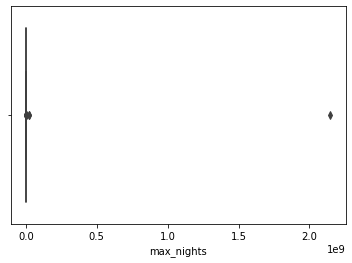

In [ ]:
sns.boxplot(x=df.max_nights, data=df)

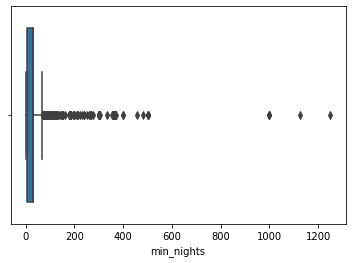

In [ ]:

sns.boxplot(x=df.min_nights, data=df)

In [ ]:
df[df.max_nights > 30]

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,rs_rating,rs_location
id,,,,,,,,,,,,,
2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,2,100.0,30,1125,94.0,10.0
3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,3,73.0,1,730,90.0,10.0
5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room,2,60.0,30,730,90.0,9.0
5803,https://www.airbnb.com/rooms/5803,"Lovely Room 1, Garden, Best Area, Legal rental",South Slope,Brooklyn,40.66829,-73.98779,Private room,2,83.0,4,90,94.0,10.0
6848,https://www.airbnb.com/rooms/6848,Only 2 stops to Manhattan studio,Williamsburg,Brooklyn,40.70837,-73.95352,Entire home/apt,3,109.0,30,730,91.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,https://www.airbnb.com/rooms/48033101,Cozy One-Bedroom with Full Kitchen Near Manhattan,Woodside,Queens,40.74415,-73.90941,Entire home/apt,3,90.0,3,1125,NaN,NaN
48033611,https://www.airbnb.com/rooms/48033611,Grand Concourse Gem,Norwood,Bronx,40.87575,-73.88399,Private room,1,520.0,1,365,NaN,NaN
48038944,https://www.airbnb.com/rooms/48038944,Natural Light-Filled Home in Upper East Side,Midtown,Manhattan,40.75774,-73.96173,Private room,1,63.0,30,90,NaN,NaN


In [ ]:
rating_null = df.rs_rating.isna()
loc_null = df.rs_location.isna()
df[rating_null & ~loc_null].shape[0]

5

In [ ]:
df[~rating_null & loc_null].shape[0]

42

In [ ]:
df[rating_null & loc_null].shape[0]

10230

In [ ]:
df[rating_null].shape[0]

10235

In [ ]:
#drop the five instances where we don't have overall rating
df = df[~(rating_null & ~loc_null)]

In [ ]:
df.isna().sum()

listing_url         0
name               13
neighborhood        0
borough             0
latitude            0
longitude           0
room_type           0
accommodates        0
price               0
min_nights          0
max_nights          0
rs_rating       10230
rs_location     10272
dtype: int64

In [ ]:
#check case
df[rating_null & ~loc_null].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0

### <font color='#eb3483'> Handling Null Names

Going to make names for them by combing their neighborhood + room type

In [ ]:
def make_name(x):
  s = x.neighborhood + " " + x.room_type
  return s

In [ ]:
df['name_na'] = df[df.name.isna()].apply(lambda x: make_name(x), axis=1)

In [ ]:
df[df.name.isna() & df.name_na.isna()].shape[0]

0

In [ ]:
df[~df.name.isna() & ~df.name_na.isna()].shape[0]

0

In [ ]:
df['updated_name'] = df.name.fillna(df.name_na)

In [ ]:
df[df.name.isna()].head()

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,rs_rating,rs_location,name_na,updated_name
id,,,,,,,,,,,,,,,
1615764,https://www.airbnb.com/rooms/1615764,NaN,Battery Park City,Manhattan,40.71239,-74.01620,Entire home/apt,2,400.0,1000,1125,NaN,NaN,Battery Park City Entire home/apt,Battery Park City Entire home/apt
2232600,https://www.airbnb.com/rooms/2232600,NaN,East Village,Manhattan,40.73215,-73.98821,Entire home/apt,2,200.0,30,365,95.0,10.0,East Village Entire home/apt,East Village Entire home/apt
4209595,https://www.airbnb.com/rooms/4209595,NaN,Greenwich Village,Manhattan,40.73473,-73.99244,Entire home/apt,4,225.0,30,1125,100.0,10.0,Greenwich Village Entire home/apt,Greenwich Village Entire home/apt
4370230,https://www.airbnb.com/rooms/4370230,NaN,Nolita,Manhattan,40.72046,-73.99550,Entire home/apt,2,215.0,30,1125,100.0,10.0,Nolita Entire home/apt,Nolita Entire home/apt
4581788,https://www.airbnb.com/rooms/4581788,NaN,Williamsburg,Brooklyn,40.71370,-73.94378,Private room,1,150.0,30,1125,NaN,NaN,Williamsburg Private room,Williamsburg Private room


In [ ]:
df[~df.name.isna()].head()

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,rs_rating,rs_location,name_na,updated_name
id,,,,,,,,,,,,,,,
2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,2,100.0,30,1125,94.0,10.0,NaN,Skylit Midtown Castle
3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,3,73.0,1,730,90.0,10.0,NaN,"Whole flr w/private bdrm, bath & kitchen(pls r..."
5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room,2,60.0,30,730,90.0,9.0,NaN,BlissArtsSpace!
5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,Midtown,Manhattan,40.76468,-73.98315,Private room,2,79.0,2,14,84.0,10.0,NaN,Large Furnished Room Near B'way
5203,https://www.airbnb.com/rooms/5203,Cozy Clean Guest Room - Family Apt,Upper West Side,Manhattan,40.80178,-73.96723,Private room,1,75.0,2,14,98.0,10.0,NaN,Cozy Clean Guest Room - Family Apt


In [ ]:
df['name'] = df['updated_name']

In [ ]:
df = df.drop(columns=['name_na', 'updated_name'])

In [ ]:
df.isna().sum()

listing_url         0
name                0
neighborhood        0
borough             0
latitude            0
longitude           0
room_type           0
accommodates        0
price               0
min_nights          0
max_nights          0
rs_rating       10230
rs_location     10272
dtype: int64

In [ ]:
df

,listing_url,name,neighborhood,borough,latitude,longitude,room_type,accommodates,price,min_nights,max_nights,rs_rating,rs_location
id,,,,,,,,,,,,,
2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,2,100.0,30,1125,94.0,10.0
3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,3,73.0,1,730,90.0,10.0
5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room,2,60.0,30,730,90.0,9.0
5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,Midtown,Manhattan,40.76468,-73.98315,Private room,2,79.0,2,14,84.0,10.0
5203,https://www.airbnb.com/rooms/5203,Cozy Clean Guest Room - Family Apt,Upper West Side,Manhattan,40.80178,-73.96723,Private room,1,75.0,2,14,98.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,https://www.airbnb.com/rooms/48033101,Cozy One-Bedroom with Full Kitchen Near Manhattan,Woodside,Queens,40.74415,-73.90941,Entire home/apt,3,90.0,3,1125,NaN,NaN
48033611,https://www.airbnb.com/rooms/48033611,Grand Concourse Gem,Norwood,Bronx,40.87575,-73.88399,Private room,1,520.0,1,365,NaN,NaN
48038944,https://www.airbnb.com/rooms/48038944,Natural Light-Filled Home in Upper East Side,Midtown,Manhattan,40.75774,-73.96173,Private room,1,63.0,30,90,NaN,NaN


### <font color = blue> Save and export data

In [ ]:
save_path = '/content/drive/My Drive/CIS 450/CIS 450 Project/air_bnb_cleaned.csv'

In [ ]:
df.to_csv(save_path)